## Proyecto Ciencia de datos en Python
#### Ruben Gonzalez 20003314

In [1]:
import numpy as np
import seaborn as sns

In [2]:
data = np.load("proyecto_training_data.npy")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
#Se utiliza Pandas para una mejor comprension de los datos
pandas_dataframe = pd.DataFrame(data,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [5]:
pandas_dataframe

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [6]:
dimensiones=pandas_dataframe.shape

In [7]:
longitud=int(dimensiones[0]*0.8)
trainingdata=pandas_dataframe[:longitud]

In [8]:
trainingdata

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [9]:
validationdata=pandas_dataframe[longitud:int(dimensiones[0])]
validationdata

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
1168,235000.0,6.0,1236.0,7.0,1935.0,120.0
1169,625000.0,10.0,1831.0,10.0,1995.0,118.0
1170,171000.0,6.0,1118.0,6.0,1977.0,76.0
1171,163000.0,6.0,1261.0,6.0,1958.0,76.0
1172,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [10]:
trainingdata.describe() #Muestra las estadisticas de cada una de las variables

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


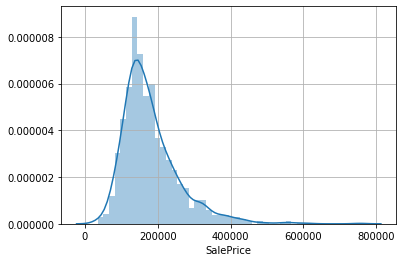

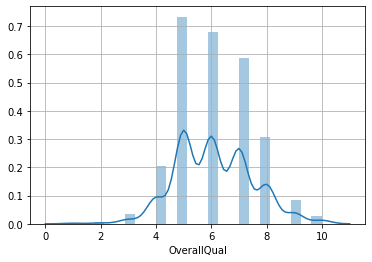

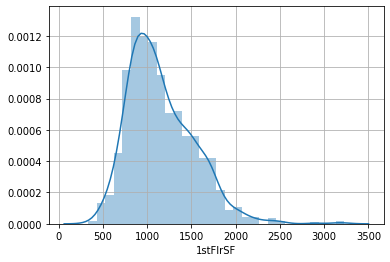

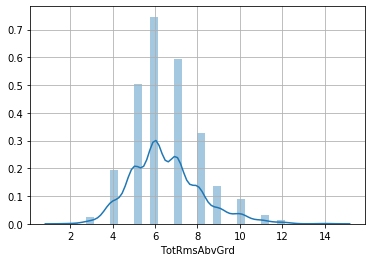

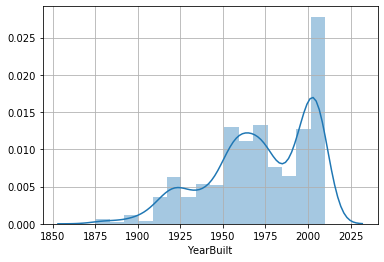

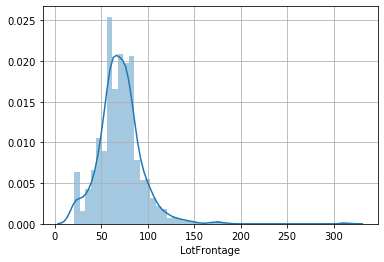

In [11]:
#Graficacion de histogramas de cada variable
for i in trainingdata.columns:
    fig=plt.figure()
    ax=fig.add_subplot(sns.distplot(trainingdata[i]))
    ax.grid()
    plt.show()

#### Calculo del coeficiente de correlacion entre x e y

In [12]:
correlaciones=trainingdata.corr()
correlaciones

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
OverallQual,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
1stFlrSF,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
TotRmsAbvGrd,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
YearBuilt,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
LotFrontage,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


Text(0.5, 0.98, 'Correlaciones entre variables')

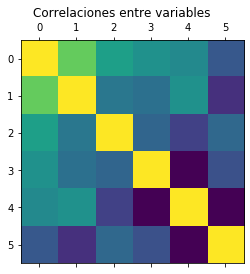

In [13]:
plt.matshow(trainingdata.corr())
plt.suptitle("Correlaciones entre variables")

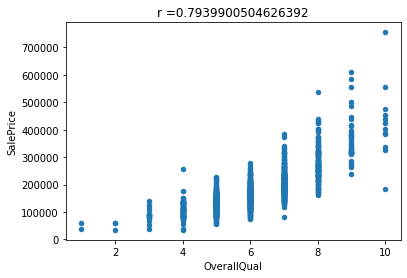

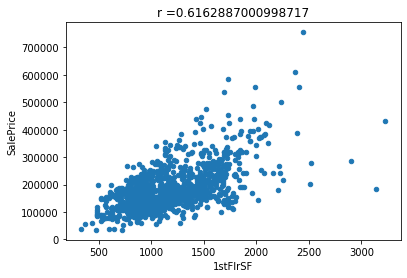

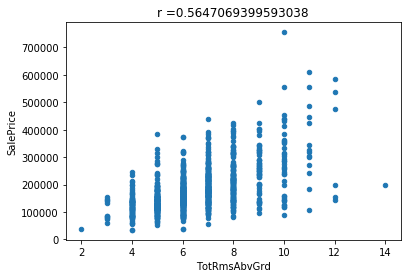

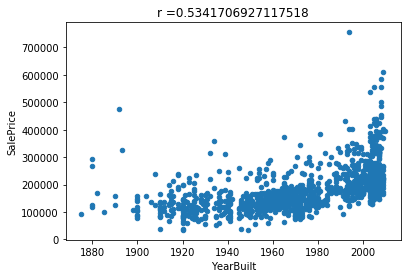

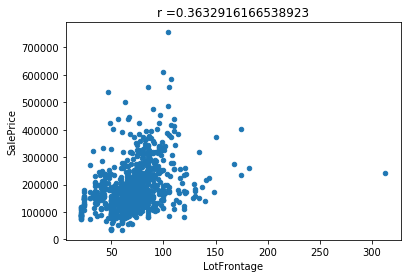

In [15]:
for i in range(1,trainingdata.columns.size):
    trainingdata.plot.scatter(x=trainingdata.columns[i],y='SalePrice',title='r ='+str(correlaciones[trainingdata.columns[i]]['SalePrice']))

Basado en los resultados anteriores, las variables con mayor potencial predictivo son:
* OverallQual	
* 1stFlrSF


### Funcion para entrenar un modelo de regresion lineal

In [16]:
def fentrena(x,y,epochs,imprimir_error_cada,lr):
    #crear matriz para calculos sobre x
    unos=np.ones(x.size)
    matrizx=pd.DataFrame()
    matrizx['x']=pd.Series(x)
    matrizx['unos']=pd.Series(unos)
    xfinal=np.array(matrizx)
    yfinal=np.array(y)
    derror=np.empty(epochs)
    dmodelo=np.empty((epochs,2))
    
    #Se inicializan los valores m,b en un vector
    mb=np.array([1,1])
    
    for i in range(0,epochs): 
        #Calculo de yhat
        yhat=xfinal.dot(mb)
    
        #Calculo del error
        derror[i]=np.mean(np.power(yfinal-yhat,2))*0.5
    
        #Calculo de gradientes
        gradiente=np.array([np.mean((yhat-yfinal)*xfinal[:,0]),np.mean((yhat-yfinal)*xfinal[:,1])])
    
        #Actualizar mb
        dmodelo[i]=mb
        mb=mb-(lr*gradiente)
        
        
        if (i % imprimir_error_cada == 0 and i!=0):
            print(str(i)+' '+str(derror[i]))
    
    return derror,dmodelo


In [17]:
def graficarerror(derrores):
    x = np.arange(0,derrores.size)
    fig = plt.figure()
    ax = fig.add_subplot() 

    ax.grid()
    ax.plot(x,derrores)

    ax.set_xlabel('iteracion')
    ax.set_ylabel('error')
    ax.set_title('Grafica de error')

    return plt.show()

In [24]:
derroresOverallQual,dmodeloOverallQual= fentrena(trainingdata['OverallQual'],trainingdata['SalePrice'],1000,250,0.0007)

250 1390710443.6442626
500 1386691860.1579394
750 1382751077.5018833


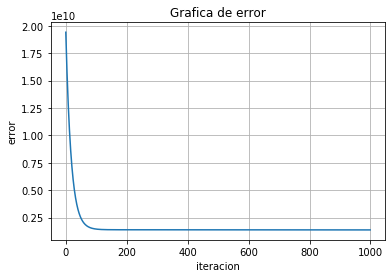

In [25]:
graficarerror(derroresOverallQual)

In [26]:
derrores1stFlrSF,dmodelo1stFlrSF= fentrena(trainingdata['1stFlrSF'],trainingdata['SalePrice'],1000,250,0.00000003)

250 1968090163.15629
500 1968090099.0370882
750 1968090037.4104588


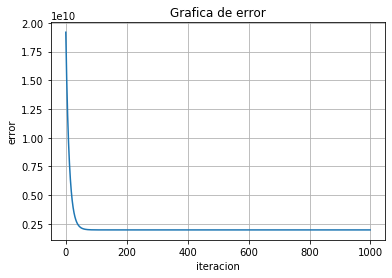

In [27]:
graficarerror(derrores1stFlrSF)

In [28]:
def graficarmodelo(x,y,dmodelo,n):
    #Obtener el ultimo m y b pues es el mas certero
    xfinal=np.array(x)
    yfinal=np.array(y)
    
    #Obtener y de la recta a partir de mb y el x proporcionado
    for i in range(0,dmodelo.shape[0]-1,n):
        fig = plt.figure()
        ax = fig.add_subplot() 
        ax.grid()
        ax.plot(xfinal,yfinal,'ro',color='orange')
        
        yrecta=(dmodelo[i,0]*xfinal)+dmodelo[i,1]
        ax.plot(xfinal,yrecta)
        ax.set_xlabel(x.name)
        ax.set_ylabel('SalesPrice')
        ax.set_title('iteracion: '+str(i+1))
    return plt.show()

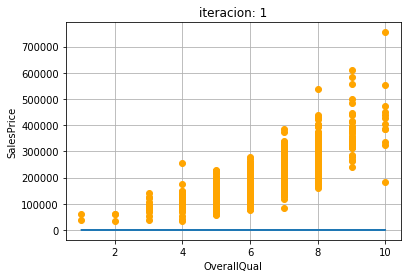

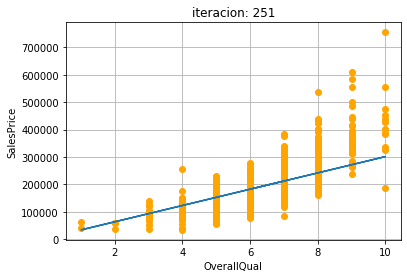

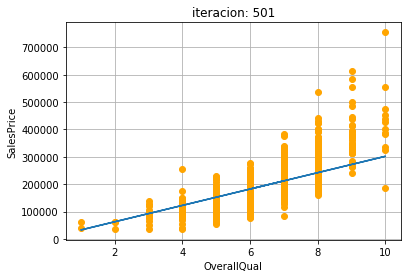

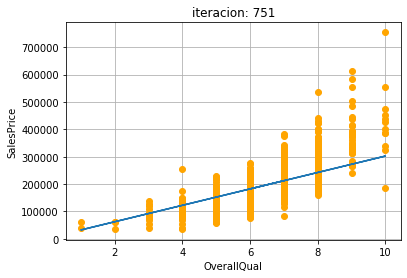

In [31]:
graficarmodelo(trainingdata['OverallQual'],trainingdata['SalePrice'],dmodeloOverallQual,250)

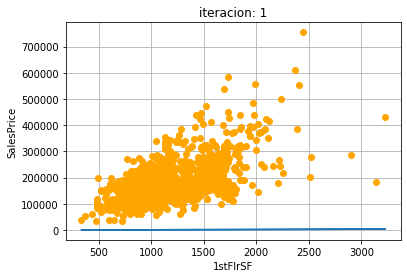

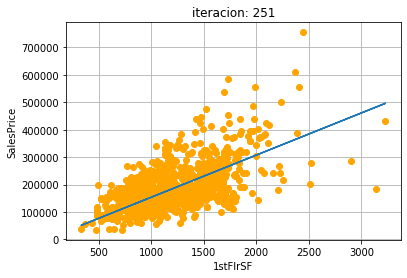

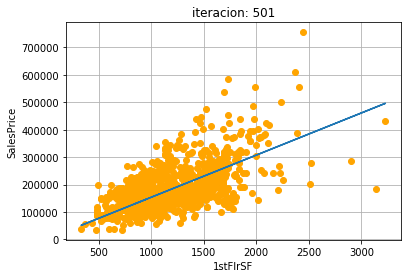

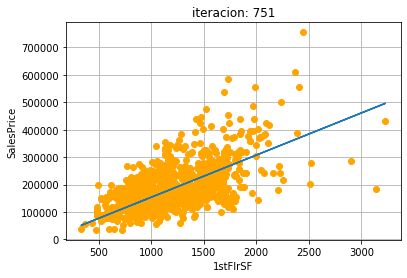

In [32]:
graficarmodelo(trainingdata['1stFlrSF'],trainingdata['SalePrice'],dmodelo1stFlrSF,250)


### Entrenamiento usando sckit-learn

In [33]:
#Creamos matrices de cada una de las variables, esto por requerimiento del metodo fit
skit_matrizSalesPrice=pd.DataFrame(trainingdata['SalePrice'])
skit_matrizOverallQual=pd.DataFrame(trainingdata['OverallQual'])
skit_matriz1stFlrSF=pd.DataFrame(trainingdata['1stFlrSF'])

#Usamos el metodo fit de sckit-learn
skit_OverallQual=LinearRegression().fit(skit_matrizOverallQual,skit_matrizSalesPrice)
skit_1stFlrSF=LinearRegression().fit(skit_matrizOverallQual,skit_matriz1stFlrSF)

### Calculo de predicciones

In [34]:
def fAplicaModelos(modeloManual, modeloSkit, vectorX):
    prediccionSkit = modeloSkit.predict(pd.DataFrame(vectorX))
    prediccionManual = modeloManual[len(modeloManual)-1,0]*vectorX+modeloManual[len(modeloManual)-1,1]
    prom = (prediccionSkit + np.array(prediccionManual))/2
    return prediccionManual, prediccionSkit, prom

Aplicacion de la funcion en datos de validacion

In [35]:
predManualOverallQual, predSkitOverallQual, promOverallQual=fAplicaModelos(dmodeloOverallQual,skit_OverallQual,validationdata['OverallQual'])
predManual1stFlrSF, predSkit1stFlrSF, prom1stFlrSF=fAplicaModelos(dmodelo1stFlrSF,skit_1stFlrSF,validationdata['1stFlrSF'])

### Cálculo de errores
Para esta funcion se utilizara la fórmula del error proporcionada en los incisos de arriba y utilizada en la función de entrenamiento.

In [36]:
def fCalculaError(predManual, predSkit, vectorY):
    #Crea dataframe para mejor manipulacion de datos
    rtest=pd.DataFrame()
    rtest['PredManual']=predManual
    rtest['PredSkit']=predSkit
    
    #Calcula el error
    errorManual = np.mean(np.power(vectorY-rtest['PredManual'],2))*0.5
    errorSkit = np.mean(np.power(vectorY-rtest['PredSkit'],2))*0.5
    return errorManual, errorSkit

In [38]:
errorManualOverallQual, errorSkitOverallQual = fCalculaError(predManualOverallQual, predSkitOverallQual, validationdata['SalePrice'] )
errorManual1stFlrSF, errorSkit1stFlrSF = fCalculaError(predManual1stFlrSF, predSkit1stFlrSF, validationdata['SalePrice'] )

aErrores=[[errorManualOverallQual, errorManual1stFlrSF], [errorSkitOverallQual, errorSkit1stFlrSF]]

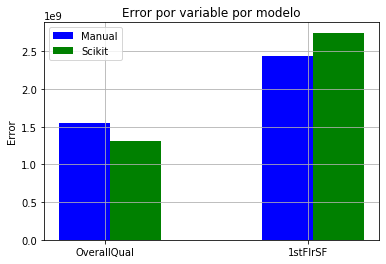

In [39]:
fig = plt.figure()
ax = fig.add_subplot() 
ax.grid()
indice=np.arange(2)
ax.bar(indice,aErrores[0],color='b', width=0.25, label='Manual')
ax.bar(indice + 0.25, aErrores[1],color='g', width=0.25, label='Scikit')
ax.set_xticks(indice + 0.1)
ax.set_xticklabels(('OverallQual', '1stFlrSF'))  
ax.set_ylabel('Error')
ax.set_title('Error por variable por modelo')
ax.legend()
plt.show()

### Conclusiones
En base al grafico de arriba podemos concluir que el modelo construido de manera manual es mas certero al realizar el analisis con la variable OverallQual, sin embargo es menos certero al utilizar la variable 1stFlrSF. Esto posiblemente ocurra dado que esta ultima variable tiene un valor r menor por lo tanto podemos asumir que el metodo predict de Scikit learn es mucho mas certero entre mas cercano es el valor r a 1.